# Affaan's Bitcoin Price Predictor Using Neural Networks for Time-Series

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [23]:
# Read 5 Year Price/Time Daily Increment Data for Bitcoin into a DataFrame
bitcoin = bitcoin = pd.read_csv('BTC5Y.csv')
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-26,9669.43,10475.00,9501.73,10366.70,10366.70,7287690240
1,2018-02-27,10393.90,10878.50,10246.10,10725.60,10725.60,6966179840
2,2018-02-28,10687.20,11089.80,10393.10,10397.90,10397.90,6936189952
3,2018-03-01,10385.00,11052.30,10352.70,10951.00,10951.00,7317279744
4,2018-03-02,10977.40,11189.00,10850.10,11086.40,11086.40,7620590080


In [24]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


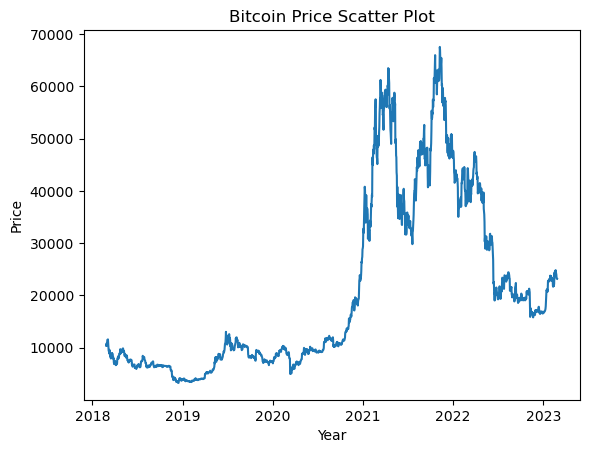

In [25]:
# Convert the "Date" column to a datetime object
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# Set the float format to show up to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Plot a scatter plot of Bitcoin price data with time in years on the x-axis and price on the y-axis
plt.plot(bitcoin['Date'], bitcoin['Close'])

# Add a title and labels to the plot
plt.title('Bitcoin Price Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Price')

# Show the plot
plt.show()

Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0093
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0070
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0138
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0070
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0095
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0084
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0076
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0152
Epoch 11/

37/37 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0091
Epoch 84/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0129
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 86/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0062
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0098
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0108
Epoch 89/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0178
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0090
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0106
Epoch 93/100


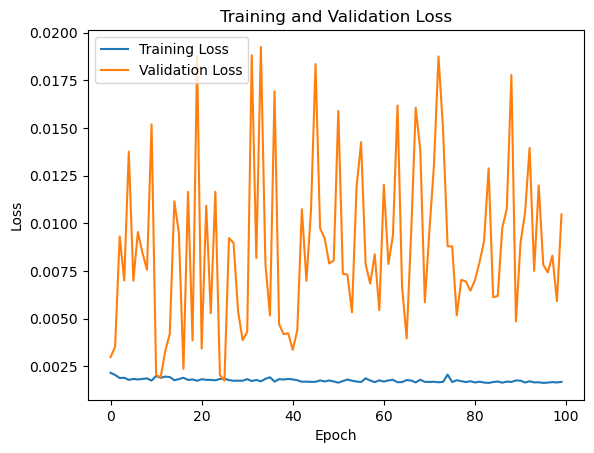

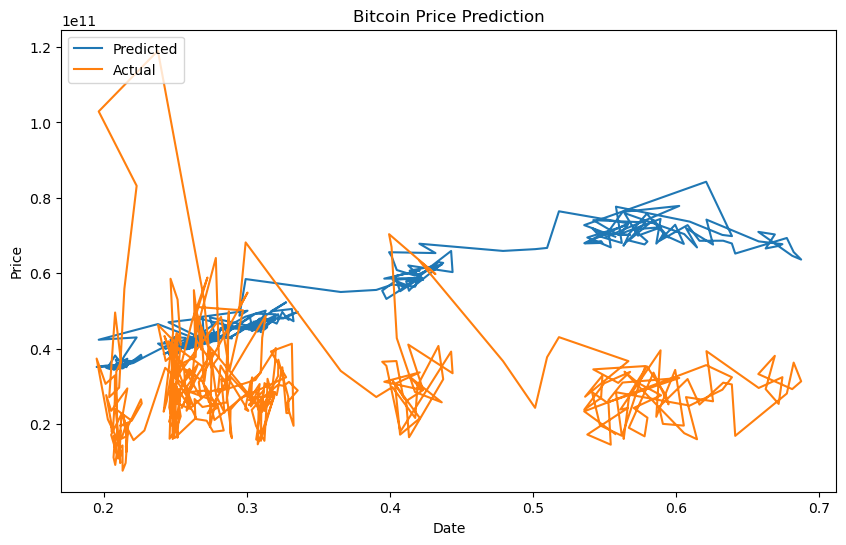

In [26]:
# Set the date as the index
bitcoin = bitcoin.set_index('Date')

# Split the data into training and testing sets
train_size = int(len(bitcoin) * 0.8)
train_data = bitcoin[:train_size]
test_data = bitcoin[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Split the data into features (X) and target (y)
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Define the Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Scale the predictions back to the original scale
y_pred = scaler.inverse_transform(np.concatenate((X_test, y_pred), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1))[:, -1]

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the actual data and the predictions
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test_data[:, -2], y_pred, label='Predicted')
ax.plot(test_data[:, -2], y_test, label='Actual')
ax.legend(loc='upper left')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
